# Project: Investigate a Dataset - [patients No-show-appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

### Dataset Description 
We Have a CSV file contains the data we are going to analyz

### Question(s) for Analysis
What fsctors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [1]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling
In this section of the report. we will load in the data , check for the cleanliness , anc then trim and clean dataset for analysis.

### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

data consist of 110527 rows and 14 clumns

In [5]:
df.duplicated().sum()

0

There is no identical duolication of the rows

In [6]:
df['PatientId'].nunique()

62299

Only 62299 out of 110527 are unique values

In [7]:
#check the number of duplicated patients id.
df['PatientId'].duplicated().sum()

48228

There is 48228 duplicated ID

In [8]:
#check the number of the duplicated patients Ids and Noshow
df.duplicated(['PatientId','No-show']).sum()

38710

There are 38710 patients Ids have the same status of showing or no, we will remove them in cleaning data stage.

In [9]:
#inspection for missing values or any issue 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no Missing values.

In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


mean age is 37 , max age is 115 , min age is -1 which is a mistake(I will remove it as it is only single value and I guess it was a mistake and it would not affect our analysis). About 50% of ages are between 18 and 55 years old and about 25% recevied SMS Majority does not have chronic diseases

Majority are not handcapped 

In [11]:
#identifying the row index of -1 value for age
mis=df.query('Age==-1')
mis

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning

In [12]:
## removing -1 value for a
df.drop(index=99832,inplace=True)

In [13]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
#correction of columns names
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_Show'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
#removing duplicated Ids with duplicated Showing status , Leaving the duplicated Ids if they different in the showing status
df.drop_duplicates(['PatientId', 'No_Show'],inplace=True)
df.shape

(71816, 14)

In [16]:
#removing unnecessary data
df.drop(['PatientId','AppointmentID','ScheduledDay' ,'AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Wrangling summary

After gathering the data from the CSV file we explored the first few rows of the data set to it's general properities , then we showed the dimensions of our data , after that we checked if there were any duplicated appointments , then explored if there was duplicated patients Ids and removed them , then we turned to data informations and if there is any missing data to handle , then we saw some figures about data like (max,min,mean etc) And finally we cleaned our data by correcting the column names and dropping unnecessary informations.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. 
### General look

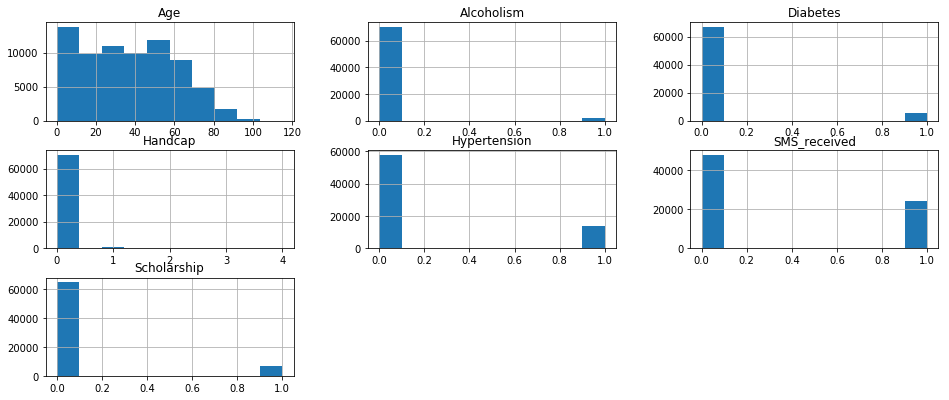

In [17]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(16,6.5));

Histogram observations <br >
age: There are many very young people in the dataset but in general the patients age is distributed evenly and the number of patients goes drastricly down for patients older than 60 years. <br >
alcoholism: Most of the patients are not alcoholics.
diabetes: Most of the patients are not diabetes but more than alcoholics.<br >
handicap: There are for handicap categories with most of the people not being handicapted. <br >
hypertension: Most patients do not have hypertension diagnosed.

In [18]:
#dividing the patients to 2 groups acc (showing or not) then exploring them
show=df.No_Show=='No'
noshow=df.No_Show=='Yes'
df[show].count() , df[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_Show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_Show          17663
 dtype: int64)

number of showed patients is 54153 which is 3 times grater than number of non showed patients which is 17663

In [19]:
df[show].mean() , df[noshow].mean()

(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

Mean age for showed patients is 37 and non showed patients is 34. Showed patients recived sms less than non showed patients which means we have to revise our system compaghine

### Investigation for influencing factors on the attendance rate

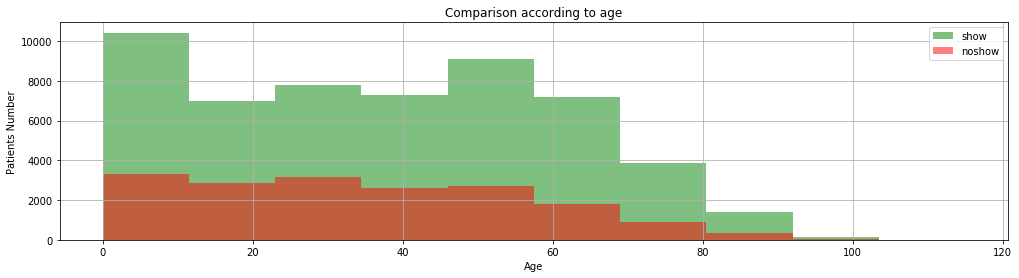

In [20]:
# does age affect attendence?

def attendance(df,col_name,attended,absent):

    plt.figure(figsize=[17,4])
    df[col_name][show].hist(alpha=.5, bins=10 , color='green', label='show')
    df[col_name][noshow].hist(alpha=.5, bins=10 , color='red', label='noshow')
    plt.legend();
    plt.title('Comparison according to age')
    plt.xlabel('Age')
    plt.ylabel('Patients Number');
attendance(df,'Age',show,noshow)


Ages from 0 to 8 are the most showing,then from 45 to 55.And the least attending are whom above 65 years old 

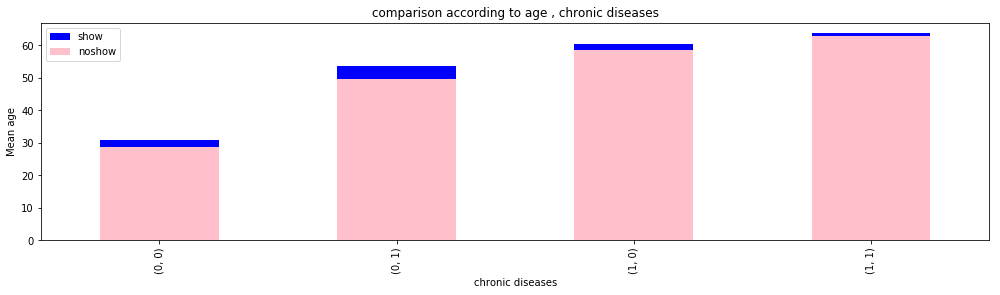

In [21]:
#does age and chronic diseases affect the attendance together?
plt.figure(figsize=[17,4])
df[show].groupby(['Hypertension','Diabetes']).mean()['Age' ].plot(kind='bar',color='blue',label='show')
df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age' ].plot(kind='bar',color='pink',label='noshow')
plt.legend();
plt.title('comparison according to age , chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('Mean age');

In [22]:
df[show].groupby(['Hypertension','Diabetes']).mean()['Age' ],df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age' ]


(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

mean age of non chronic diseases showing patients is 30 and non showwing is 28 mean age of Hypertensive diabetic showing patients is around 64 and non showing patients is around 63.Which means that there is a correlation between age and chronic diseases.

### does gender affect the attendance?

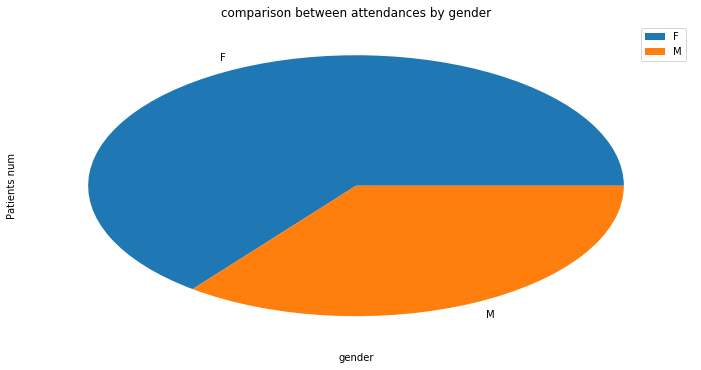

In [23]:
#what is the persentage of sexes attending?
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[12,6])
    df[col_name][show].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title('comparison between attendances by gender')
    plt.xlabel('gender')
    plt.ylabel('Patients num');
attendance(df,'Gender',show,noshow)

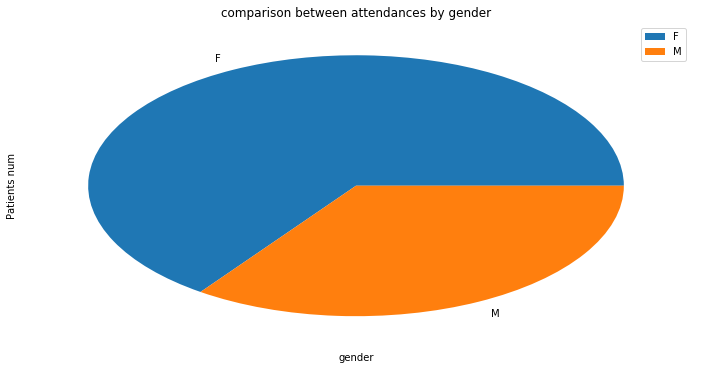

In [24]:
#what is the percentage of sexes absent?
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[12,6])
    df[col_name][noshow].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title('comparison between attendances by gender')
    plt.xlabel('gender')
    plt.ylabel('Patients num');
attendance(df,'Gender',show,noshow)

Gender has no clear affect on attendance.

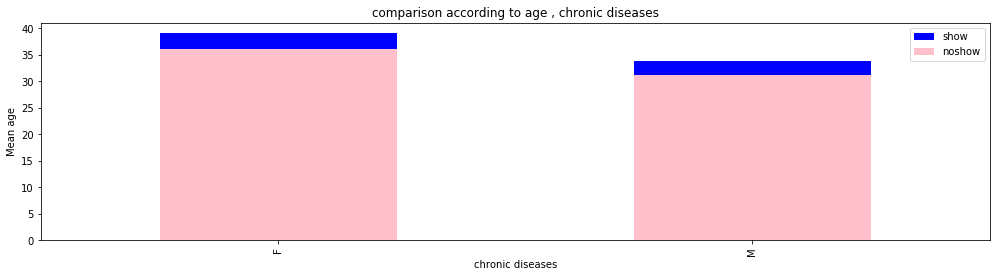

In [25]:
plt.figure(figsize=[17,4])
df[show].groupby('Gender').Age.mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Gender').Age.mean().plot(kind='bar',color='pink',label='noshow')
plt.legend();
plt.title('comparison according to age , chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('Mean age');

In [26]:
print(df[show].groupby('Gender').Age.mean() ,df[noshow].groupby('Gender').Age.mean(),df[show].groupby('Gender').Age.median(),df[noshow].groupby('Gender').Age.median())

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64 Gender
F    39
M    32
Name: Age, dtype: int64 Gender
F    34
M    29
Name: Age, dtype: int64


There is no correlation between age and gender affecting the show rate<br>
the mean and the median of sexes ages are almost the same

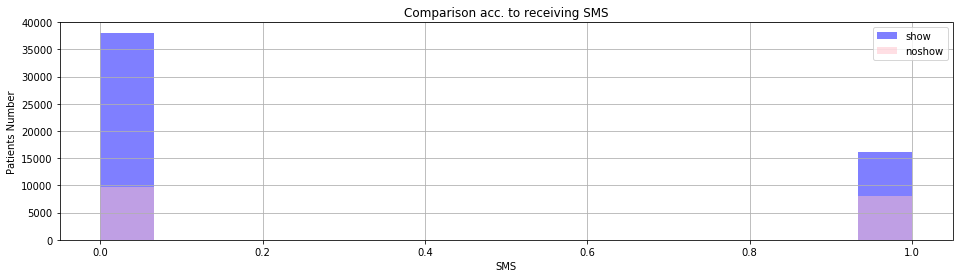

In [27]:
# does receiving SMS affect the attendence
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=.5,bins=15,color='blue',label='show');
    df[col_name][noshow].hist(alpha=.5,bins=15,color='pink',label='noshow');
    plt.legend();
    plt.title('Comparison acc. to receiving SMS')
    plt.xlabel('SMS')
    plt.ylabel( 'Patients Number');    
attendance(df,'SMS_received',show,noshow)

Number of showing patients without receiving sms is grater than showing patients with receiving sms.which means we need to revisit our sms compaghin

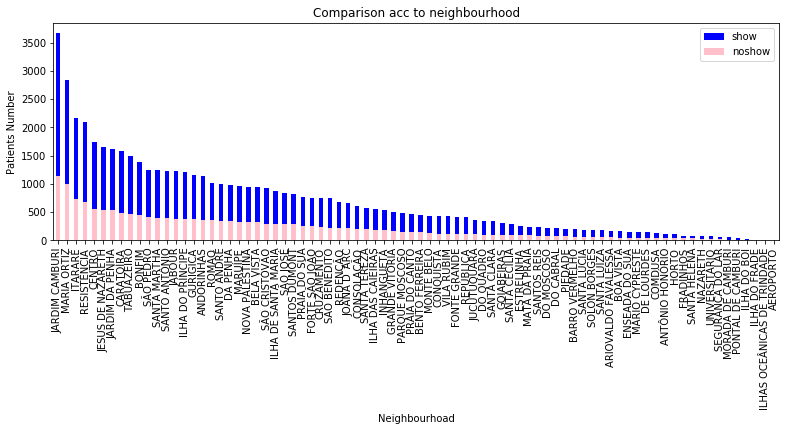

In [28]:
#does neighbourhood affect the attendance
plt.figure(figsize=[13,4])
df.Neighbourhood[show]. value_counts().plot(kind='bar' ,color='blue',label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar',color='pink',label='noshow')
plt.legend()
plt.title('Comparison acc to neighbourhood')
plt.xlabel('Neighbourhoad')
plt.ylabel('Patients Number');


Neighbourhood has a great effect on attendence or not, JARDIM CAMBURI has the greatest number of patients and also has tne greatest showing rate


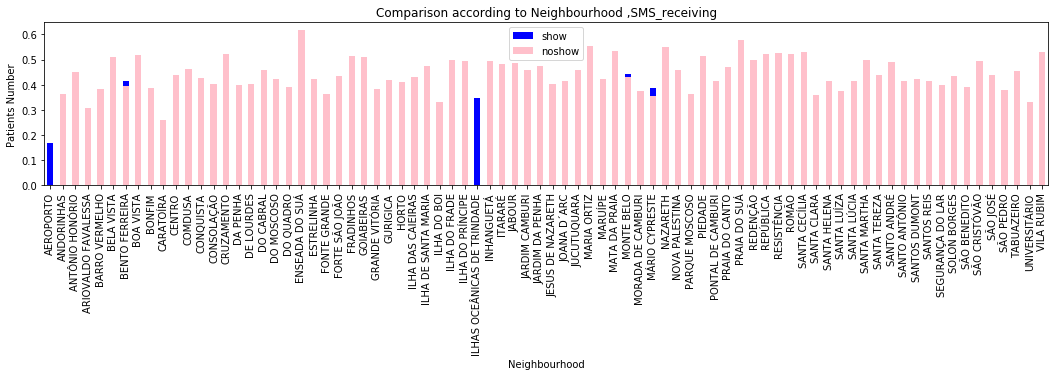

In [29]:
plt.figure(figsize=[18,3])

df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind ='bar',color='blue',label='show')
df[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind ='bar',color='pink', label='noshow')
plt.legend()
plt.title('Comparison according to Neighbourhood ,SMS_receiving')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

SMS has response in only 5 neighbourhoods ILHAS OCEANICAS DE TRINDADE is the most responsive neighbourhood to SMS

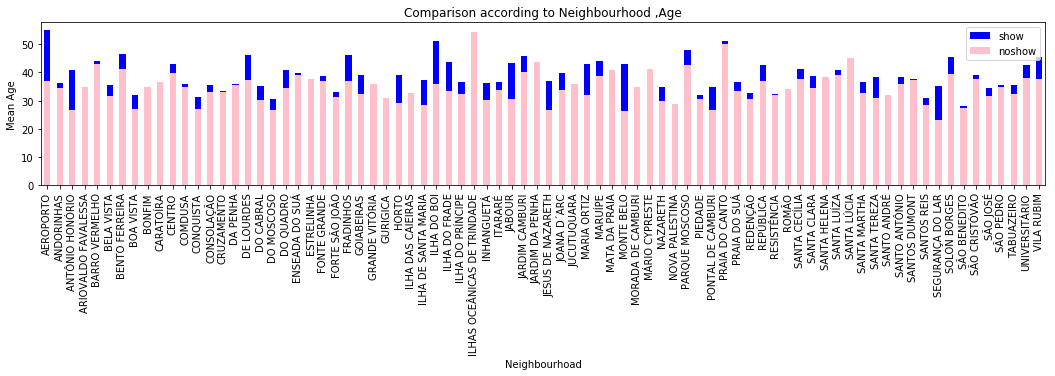

In [30]:
plt.figure(figsize=[18,3])
df[show].groupby('Neighbourhood').Age.mean().plot(kind ='bar',color='blue',label='show')
df[noshow].groupby('Neighbourhood').Age.mean().plot(kind ='bar',color='pink', label='noshow')
plt.legend()
plt.title('Comparison according to Neighbourhood ,Age')
plt.xlabel('Neighbourhoad')
plt.ylabel('Mean Age');


Patients attendance from specific neighbourhood differ accroding to ages AEROPORTO then ILHA DO BOI are with high ages attendance

<a id='conclusions'></a>
## Conclusions
Neighbourhooh has a great  on attendence or not, JARDIM CAMBURI has the greatest number of patients and also has tne greatest showing rate
Number of showing patients fram specific neighbourhood affected by receiving SMS and Ages.

Age has a clear influence on the showing rate Ages from 0 : 8 are the most showing(parents taking care of their kids) then from 45:55 and the least attending
are whom above 65 years old

Number of showing patients without receiving sms is greater than showing patients with receiving sms , which means that we need to revisit our sms
compaghin

## Limitations
No clear correlation between showing and gender , chronic diseases , enrollement in the welfare program

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])